In [2]:
import pandas as pd

In [3]:
# df = pd.read_csv('data/Fahrraddiebstahl.csv') # not running, encoding must be set!
df = pd.read_csv('data/Fahrraddiebstahl.csv', encoding='latin-1')
df.columns = df.columns.str.lower()

[Website hosting the dataset daten.berlin.de](https://daten.berlin.de/datensaetze/fahrraddiebstahl-berlin)

- Lizenz:
    - Creative Commons Namensnennung CC-BY License
- Kategorie:
   - Öffentliche Sicherheit
- Geographische Abdeckung: 
    - Berlin
- Geographische Granularität: 
    - Berlin
- Zeitliche Granularität: 
    - Tag
- Veröffentlicht: 
    - 08.09.2021
- Aktualisiert: 
    - 09.09.2021
- Veröffentlichende Stelle: 
    - Polizei Berlin LKA St 14
- E-Mail Kontakt: 
    - onlineredaktion AT polizei.berlin.de

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39407 entries, 0 to 39406
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   angelegt_am            39407 non-null  object
 1   tatzeit_anfang_datum   39407 non-null  object
 2   tatzeit_anfang_stunde  39407 non-null  int64 
 3   tatzeit_ende_datum     39407 non-null  object
 4   tatzeit_ende_stunde    39407 non-null  int64 
 5   lor                    39407 non-null  int64 
 6   schadenshoehe          39407 non-null  int64 
 7   versuch                39407 non-null  object
 8   art_des_fahrrads       39407 non-null  object
 9   delikt                 39407 non-null  object
 10  erfassungsgrund        39407 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.3+ MB


In [26]:
df['erfassungsgrund'].value_counts()

Sonstiger schwerer Diebstahl von Fahrrädern                        35274
Einfacher Diebstahl von Fahrrädern                                  2158
Sonstiger schwerer Diebstahl in/aus Keller/Boden von Fahrrädern     1890
Einfacher Diebstahl aus Keller/Boden von Fahrrädern                   85
Name: erfassungsgrund, dtype: int64

In [5]:
df.head(2)

,angelegt_am,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,erfassungsgrund
0,14.09.2020,10.09.2020,10,10.09.2020,12,3400723,706,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
1,29.09.2020,09.09.2020,16,10.09.2020,7,9200716,220,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


In [6]:
df.describe()

,tatzeit_anfang_stunde,tatzeit_ende_stunde,lor,schadenshoehe
count,39407.000000,39407.000000,3.940700e+04,39407.000000
mean,14.525922,13.276626,5.534755e+06,825.206055
std,5.344165,5.217552,3.336003e+06,809.575186
min,0.000000,0.000000,1.100101e+06,0.000000
25%,10.000000,9.000000,2.500831e+06,372.000000
50%,16.000000,14.000000,4.501042e+06,599.000000
75%,19.000000,17.000000,8.100314e+06,999.000000
max,23.000000,23.000000,1.260124e+07,9999.000000


- ToDos, columns:
    - _Time columns_ to datetime / interval
    - _lor_: investigate, zfill leading 0, type as string
    - _versuch_: recode 0/1
    - _delikt_:
        - Fahrraddiebstahl = 37517
        - Keller- und Bodeneinbruch = 1890
        - drop Keller- und Bodeneinbruch


<AxesSubplot:>

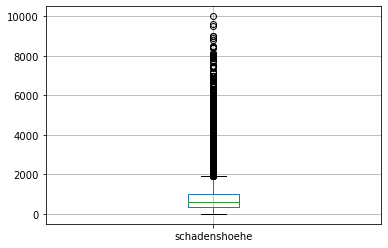

In [5]:
df.boxplot(column='schadenshoehe')

<AxesSubplot:xlabel='schadenshoehe'>

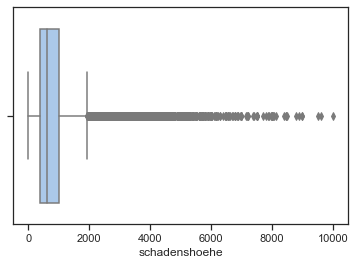

In [14]:

import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(data=df, x='schadenshoehe')

### Vectordata
State: 01.01.2021 (542 PLR)

_"Die 7z-Datei enthält Dateien zu den drei Hierarchiestufen: Prognoseraum, Bezirksregion und Planungsraum"_

In [7]:
import fiona
shape = fiona.open('data/LOR_SHP_2021/lor_bzr.shp')
shape.schema

{'properties': OrderedDict([('BZR_ID', 'str:254'), ('BZR_NAME', 'str:254')]),
 'geometry': 'Polygon'}

In [8]:
type(shape)

fiona.collection.Collection

In [9]:
import geopandas as gdp

In [10]:
# Build the GeoDataFrame from Fiona Collection
gdf = gdp.GeoDataFrame.from_features([feature for feature in shape])
# Get the order of the fields in the Fiona Collection; add geometry to the end
columns = list(shape.meta["schema"]["properties"]) + ["geometry"]
# Re-order columns in the correct order
gdf = gdf[columns]

<AxesSubplot:>

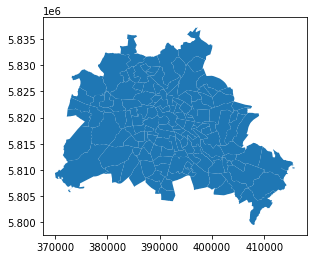

In [11]:
gdf.plot()

![Berlin](https://berlinmap360.com/carte/image/en/berlin-neighborhood-map.png)


In [ ]:
# adding h3 hexbin h3_id
# df_combined['hex'] = df_combined.apply(lambda x: h3.geo_to_h3(x.lat, x.lon, resolution = 7), axis = 1)

In [ ]:
# df_hex = df_combined[['hex', 'delikt']]
# # df_hex.rename(columns={'hex' : 'geometry'}, inplace=True)